# Diabetes Detection Using SVM

## Importing the libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  Importing the dataset

In [50]:
dataset = pd.read_csv("diabetes.csv")

## Data Analysis

In [51]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
dataset.shape

(768, 9)

In [54]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
dataset['Outcome'].value_counts()   # 0 --> Non-diabetic; 1 --> Diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [57]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Separating the features and labels

In [58]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVC model on the Training set

In [41]:
from sklearn.svm import SVC

classifier = SVC(kernel="rbf", C=0.25, gamma=0.1, random_state=0)
classifier.fit(X_train, y_train)

SVC(C=0.25, gamma=0.1, random_state=0)

## Predicting a new result

In [42]:
print(classifier.predict([X_test[0]]))

[1]


## Predict the Test set results

In [43]:
y_pred = classifier.predict(X_test)
y_test_pred = np.c_[y_test, y_pred]

## Making the Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acs = accuracy_score(y_test, y_pred) 
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acs * 100:.2f}%")


Confusion Matrix:
 [[97 10]
 [18 29]]
Accuracy: 81.82%


## Visualizing the confusion matrix as a heatmap

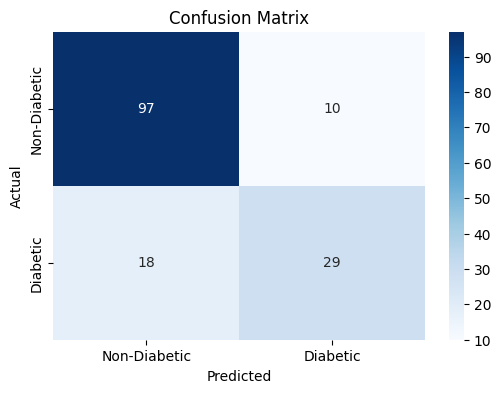

In [60]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Diabetic", "Diabetic"],
    yticklabels=["Non-Diabetic", "Diabetic"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Applying k-Fold Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [46]:
print("Acccuray: {:.2f}%".format(accuracies.mean() * 100))
print("Standard Devaiation: {:.2f}%".format(accuracies.std() * 100))

Acccuray: 76.39%
Standard Devaiation: 4.08%


## Visualizng the performance trend across each fold

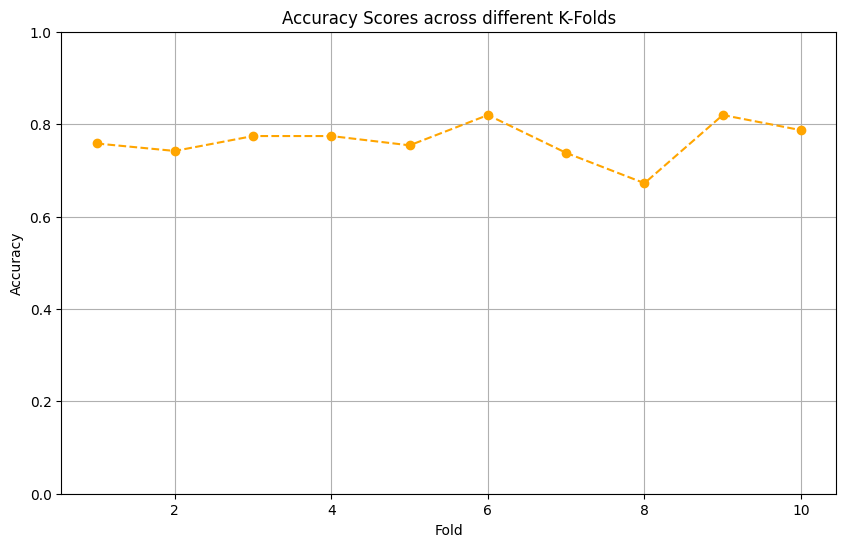

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='--', color='orange')
plt.title('Accuracy Scores across different K-Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)
plt.show()

## Applying Grid Search to find the best model and the best parameters

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = [
    {
        "C": [0.25, 0.5, 0.75, 1],
        "kernel": ["rbf"],
        "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    },
    {
        "C": [0.25, 0.5, 0.75, 1],
        "kernel": ["poly"],
        "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    },
]

grid_search = GridSearchCV(
    estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [48]:
print("Best Acccuray: {:.2f}%".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)

Best Acccuray: 76.39%
Best Parameters: {'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}


## Visualizing the best hyperparameter outcome from grid search

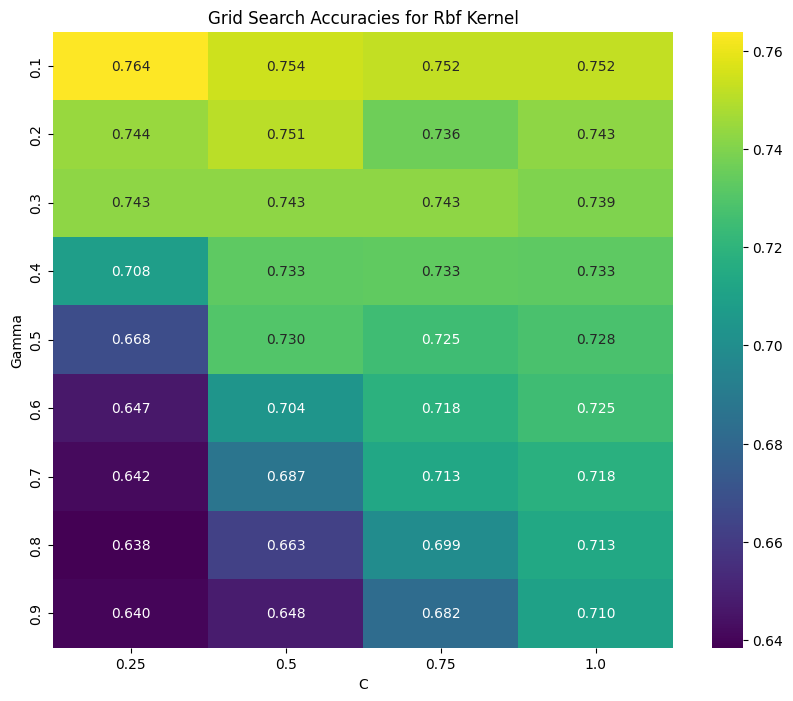

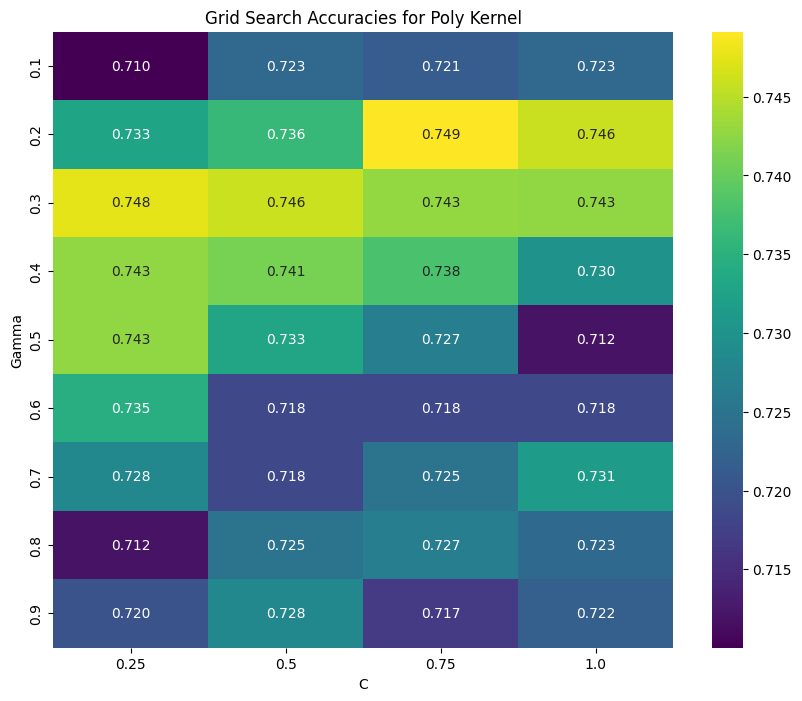

In [78]:
results = pd.DataFrame(grid_search.cv_results_)

kernels = results['param_kernel'].unique()

for kernel in kernels:
    kernel_results = results[results['param_kernel'] == kernel]
    pivot_table = kernel_results.pivot(index='param_gamma', columns='param_C', values='mean_test_score')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
    plt.title(f'Grid Search Accuracies for {kernel.capitalize()} Kernel')
    plt.xlabel('C')
    plt.ylabel('Gamma')
    plt.show()

